Generation 1, Best Fitness: 112.87827131465727, Best Antibody: [-1.99190765  3.05214219  1.05803413 -1.44863405  0.5216614   3.08302289
 -2.85771098  2.86414697 -2.05532063 -1.69393443]
Generation 2, Best Fitness: 112.87827131465727, Best Antibody: [-1.99190765  3.05214219  1.05803413 -1.44863405  0.5216614   3.08302289
 -2.85771098  2.86414697 -2.05532063 -1.69393443]
Generation 3, Best Fitness: 112.87827131465727, Best Antibody: [-1.99190765  3.05214219  1.05803413 -1.44863405  0.5216614   3.08302289
 -2.85771098  2.86414697 -2.05532063 -1.69393443]
Generation 4, Best Fitness: 112.87827131465727, Best Antibody: [-1.99190765  3.05214219  1.05803413 -1.44863405  0.5216614   3.08302289
 -2.85771098  2.86414697 -2.05532063 -1.69393443]
Generation 5, Best Fitness: 112.87827131465727, Best Antibody: [-1.99190765  3.05214219  1.05803413 -1.44863405  0.5216614   3.08302289
 -2.85771098  2.86414697 -2.05532063 -1.69393443]
Generation 6, Best Fitness: 112.87827131465727, Best Antibody: [-1.991

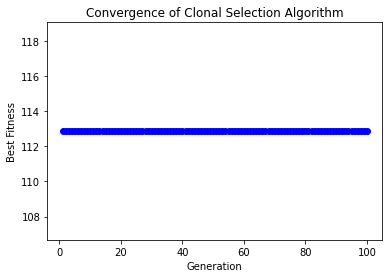

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the problem-specific details
dimension = 10  # Dimensionality of the problem
A = 10  # Constant for the Rastrigin function

# CSA Parameters
population_size = 50
cloning_factor = 0.2
mutation_rate = 0.1
generations = 100

# Initialize the population
def initialize_population():
    return np.random.uniform(-5.12, 5.12, size=(population_size, dimension))

# Evaluate the fitness of antibodies (Rastrigin function)
def evaluate_fitness(antibodies):
    return A * dimension + np.sum(antibodies**2 - A * np.cos(2 * np.pi * antibodies), axis=1)

# Clone antibodies based on their fitness
def clone_antibodies(antibodies, fitness_values):
    num_clones = int(cloning_factor * population_size)
    clones = []

    for i in range(num_clones):
        # Selection probability based on fitness
        selection_probs = fitness_values / np.sum(fitness_values)
        selected_index = np.random.choice(population_size, p=selection_probs)

        # Clone the selected antibody
        clone = antibodies[selected_index].copy()

        # Mutate the clone
        mutation_mask = np.random.rand(*clone.shape) < mutation_rate
        clone[mutation_mask] += np.random.uniform(-0.1, 0.1, np.sum(mutation_mask))

        clones.append(clone)

    # Return the clones without exceeding the original population size
    return np.array(clones)

# Main Clonal Selection Algorithm
def clonal_selection_algorithm():
    antibodies = initialize_population()
    best_fitness_values = []

    for generation in range(generations):
        # Evaluate fitness of antibodies
        fitness_values = evaluate_fitness(antibodies)

        # Clone and mutate antibodies
        cloned_antibodies = clone_antibodies(antibodies, fitness_values)
        antibodies = np.vstack((antibodies, cloned_antibodies))[:population_size]

        # Evaluate fitness of the new antibodies
        fitness_values = evaluate_fitness(antibodies)

        # Record the best fitness of each generation
        best_fitness_values.append(min(fitness_values))

        # Report the best antibody of each generation
        best_antibody = antibodies[np.argmin(fitness_values)]
        print(f"Generation {generation + 1}, Best Fitness: {min(fitness_values)}, Best Antibody: {best_antibody}")

    # Plot the convergence
    plt.plot(range(1, generations + 1), best_fitness_values, marker='o', linestyle='-', color='b')
    plt.title('Convergence of Clonal Selection Algorithm')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.show()

if __name__ == "__main__":
    # Run Clonal Selection Algorithm
    clonal_selection_algorithm()


The Clonal Selection Algorithm (CSA) is applied to optimize the Rastrigin function, a common benchmark problem in optimization. In this specific instance, the optimization is conducted in a 10-dimensional space, with the Rastrigin function characterized by a constant value (A=10). The algorithm is configured with parameters such as a population size of 50 antibodies, a cloning factor of 20%, a mutation rate of 10%, and the algorithm runs for 100 generations.

The population of antibodies is initialized randomly within the specified search space. The Rastrigin function is employed to evaluate the fitness of each antibody within the population. The algorithm iteratively proceeds through generations, where antibodies with higher fitness have a higher chance of being cloned. Cloned antibodies undergo mutation, and the resulting clones are integrated with the original population, with care taken to avoid exceeding the predefined population size.

Throughout the optimization process, the algorithm records and prints the best fitness value and the corresponding antibody at each generation. Additionally, a plot visualizing the convergence of the algorithm over generations is generated, illustrating how the best fitness values change over the course of the optimization. This Clonal Selection Algorithm is tailored to efficiently explore and exploit the solution space of the Rastrigin function, aiming to find the optimal solution that minimizes the defined fitness criteria.